## Collavorative filtering for 2 layers 
e.g. books and movies


    
    

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import math

## Read the ratings 

In [2]:
df = pd.read_excel('ratings_movies.xlsx', header=None)
df.columns = [f'u{i}' for i in range(len(list(df)))]
df

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13,u14
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1,1


In [3]:
#  Remove one user to distinguish axis 
del df['u14']
df

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


In [12]:
def J(Y, R, X, Theta, lambd):
    '''    
    Y - matrix of ratings , shape = (num_movies, num_users)
    R - similar as Y but 1 marked values 0 marks missed values (Y== 0 )  shape = (num_movies, num_users)
    X - params of movies, shape = (num_movies, num_features)
    Theta  - params of users. shape = (num_features, num_users)
    lambda - regularization param 
    :return expression for cost function
    '''
    assert (X.shape[1] == Theta.shape[0])
    h = X @ Theta

    try:
        assert (h.shape == Y.shape)
    except:
        print('h.shape {} !=Y.shape {}'.format(h.shape, Y.shape))

    J = 1 / 2 * np.sum(((h - Y) * R) ** 2) + lambd / 2 * np.sum(X ** 2) + lambd / 2 * np.sum(Theta ** 2)
    
    try:
        assert (len(J.shape) == 0)
    except:
        print('J is not raw number. J.shape = ', J.shape)

    return J

def J_derivative(Y, R, X, Theta, num_movies, num_users, num_features, lambd):
    cost_matr = (X @ Theta - Y) * R  # n_movies * n_users

    X_grad = cost_matr @ Theta.T
    Theta_grad = (cost_matr.T @ X).T

    try:
        assert (X_grad.shape == X.shape)
        assert (Theta_grad.shape == Theta.shape)
    except:
        print('Check gradient calculus')

    # Regularization part :
    X_grad += lambd * X
    Theta_grad += lambd * Theta

    return X_grad, Theta_grad

def fit(Y, R, num_features=10, alpha=0.0001, lambd=.01, eps=.1, max_iter=1000, step=100, verbose=0):
    assert isinstance(Y, np.ndarray)
    assert isinstance(R, np.ndarray)
    num_movies, num_users = Y.shape

    if verbose:
        print (f'num_movies= {num_movies}, num_users= {num_users}')
        print('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))

    #     X= params[:num_movies*num_features].reshape(num_movies,num_features)
    #     Theta = params[num_movies*num_features:].reshape(num_features,num_users)

    np.random.seed(2019)
    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn(num_features, num_users)

    J_hist = [-1]  # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True  # flag to continue next iter (grad desc step)
    iter_number = 0  # used for limit by max_iter

    try:
        while continue_iter:
            # Do step of gradient descent
            X_grad, Theta_grad = J_derivative(Y, R, X, Theta, num_movies, num_users, num_features, lambd)
            X = X - alpha * X_grad
            Theta = Theta - alpha * Theta_grad

            # keep history of J values
            J_hist.append(J(Y, R, X, Theta, lambd))
            # check criteria of exit (finish grad desc)
            if iter_number > max_iter:  # if limit succeeded
                continue_iter = False
                print('iter_number> max_iter')
            elif np.abs(J_hist[iter_number - 1] - J_hist[iter_number]) < eps:  # if accuracy is succeeded
                continue_iter = False
                print('J_hist[{}]={}, previous= {}, eps = {}'.format(iter_number,J_hist[iter_number], J_hist[iter_number - 1], eps))
            iter_number += 1

            if verbose and iter_number % step == 0:
                print('{}: {}'.format(iter_number, J_hist[iter_number - 1]))
        return X, Theta, J_hist
    except Exception as e:
        print('Training is interrupted due to error:', e)
        return X, Theta, J_hist

In [33]:
def fill_matrix(df_target, n_features=20, max_iter= 10000, verbose= 1, lr = 0.0005,eps= .0001, step_display=50 ):
    nm, nu = df.shape 
    Y= df_target.copy().values
    R= df_target.applymap(lambda x: int(bool(x))).values
    scale_coef = 10 
    Ymean, Ynorm, scale = normalize_Y(Y, R, scale_coef= scale_coef)
    X, Theta, J_hist = fit(Ynorm, R, num_features=n_features, alpha=lr, lambd=1, max_iter=max_iter,
                           eps=eps, step=step_display, verbose=verbose)

    draw_cost_changes(J_hist) 
    pred = X @ Theta
    pred_rescaled = (pred + Ymean) * scale / scale_coef
    df_pred= pd.DataFrame(pred_rescaled, index= df_target.index, columns = df_target.columns)
    df_pred= df_pred.applymap(round)
    return df_pred

def refine_df(df, p_drop = 0.4, axis= 0, seed = 2020):
    '''assigns zero to  p_drop % amount of values for every column if axis=0 / row if axis=1  '''
    nm, nu = df.shape
    n_drop= int (df.shape[axis]*p_drop)
    if seed:     
        np.random.seed(seed)
    df_drop= df.copy()
    for iu in range(nu): 
        drop_indices= sorted(np.random.choice(nm, n_drop, replace=False))    
        for di in drop_indices:        
            df_drop.iloc[di, iu] = 0 
    return df_drop   

def normalize_Y(Y,R,scale_coef = 10 ):
    '''
    normalize along axis 1 - separately for every moview 
    '''
    assert isinstance(Y, np.ndarray) # make sure its np array - wrong results for pd.DataFrame
    assert isinstance(R, np.ndarray)
    scale = Y[R == 1].max() - Y[R == 1].min()
    assert (len(scale.shape) == 0) # make sure it is raw number 
    Y_scaled = Y / scale * scale_coef # make it more contrast
    n_0 = Y.shape[0]
    Ymean = np.zeros((n_0, 1))
    Ynorm = np.zeros(Y.shape)
    for i in range(n_0):        
        idx = R[i,:] == 1
        if idx.sum()==0:
            Ymean[i]= 0     
        else:         
            Ymean[i] = Y_scaled[i, idx].mean()
        Ynorm[i, idx]= Y_scaled[i, idx] - Ymean[i]
    return Ymean, Ynorm, scale


def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

def evaluate(df, df_pred):
    print ('MSE = {:.2f}'.format((np.sum((df-df_pred).values**2))/df.size))
    return df-df_pred


num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.0001, max_iter= 10000
50: 666.4490712709326
100: 366.9636736798785
150: 285.90469373886447
200: 255.38346388802682
250: 239.49168620244683
300: 228.80483306145385
350: 220.3716993947453
400: 213.1088275964159
450: 206.56595907365056
500: 200.53596852187215
550: 194.9137786577283
600: 189.64013760454182
650: 184.67761197940627
700: 179.99977844956868
750: 175.58613494574877
800: 171.41960422345142
850: 167.48525870193683
900: 163.7696412897754
950: 160.26038687662046
1000: 156.94600044937818
1050: 153.81571941912102
1100: 150.85942269411353
1150: 148.06756657674504
1200: 145.43113660712004
1250: 142.94160926015576
1300: 140.59091999561065
1350: 138.3714355983082
1400: 136.27592956112335
1450: 134.29755973558633
1500: 132.42984775429392
1550: 130.66665989793546
1600: 129.00218918362296
1650: 127.43093851653279
1700: 125.94770478881642
1750: 124.54756383727047
1800: 123.22585618975063
1850: 121.97

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,2,1,2,1,5,5,5,3,3
1,4,4,5,1,1,1,1,1,1,5,5,5,2,2
2,3,5,4,1,1,1,1,1,1,5,4,5,2,2
3,3,3,3,5,5,4,1,1,1,5,5,4,1,1
4,4,3,4,5,5,5,2,1,2,5,5,5,1,2
5,3,3,3,5,5,5,1,1,1,5,5,4,1,1
6,1,1,1,3,3,3,5,5,5,5,4,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,2,1,3,3,3,5,5,5,5,5,5,1,2
9,4,4,4,4,4,4,3,3,3,4,4,4,3,1


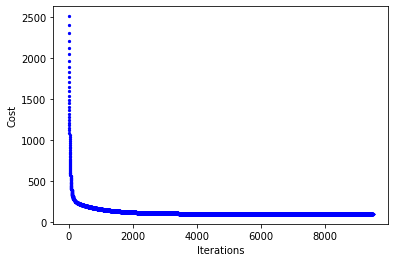

In [34]:


n_features=20
max_iter= 10000 
verbose= 1
lr = 0.0005
eps= .0001 

df_target= refine_df(df, seed = 2020)

df_pred = fill_matrix(df_target, 
            n_features= n_features, 
            max_iter= max_iter,
            verbose= verbose,
            lr =lr,
            eps= eps,
            step_display=50 )

evaluate(df, df_pred)
df_pred

In [35]:
diff = evaluate(df, df_pred)
diff 

MSE = 0.18


,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0,0,0,0,0,-1,0,-1,0,0,0,0,-1,-1
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-1,0,-1,0,0,0,-1,0,-1,0,0,0,0,-1
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,-1,0,0,0,0,0,0,0,0,0,0,0,-1
9,0,0,0,0,0,0,-1,-1,-1,0,0,0,-2,0


## Case of missed all rates for movie

In [36]:
df_target = df.copy()
df_target.iloc[0]=0
df_target

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


num_movies= 15, num_users= 14
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.0001, max_iter= 10000
50: 708.1806333396758
100: 358.30113182950265
150: 273.28378696628124
200: 241.76295378232044
250: 225.13644559771166
300: 213.99515813559114
350: 205.37203603078657
400: 198.12123751134095
450: 191.7292700992618
500: 185.93860600351297
550: 180.60772856767915
600: 175.65236592551184
650: 171.01843566737148
700: 166.66867978185462
750: 162.57568825176907
800: 158.71809097828248
850: 155.07839881015235
900: 151.6417374451221
950: 148.39508108162713
1000: 145.3267740090056
1050: 142.42622249516097
1100: 139.68368987891924
1150: 137.0901556817388
1200: 134.63721534589916
1250: 132.31700634358856
1300: 130.12215179708627
1350: 128.04571599820804
1400: 126.08116820631604
1450: 124.2223523464871
1500: 122.46346101782899
1550: 120.79901273062126
1600: 119.22383162447457
1650: 117.73302914178532
1700: 116.32198728085416
1750: 114.98634315591613
1800: 113.7219746627913
1850: 112.52

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


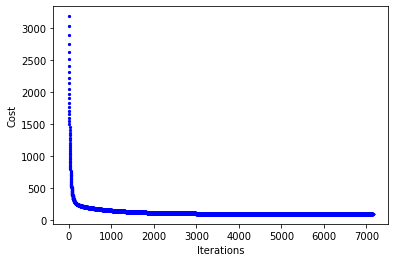

In [38]:
df_pred = fill_matrix(df_target, 
            n_features= n_features, 
            max_iter= max_iter,
            verbose= verbose,
            lr =lr,
            eps= eps,
            step_display=50 )

diff = evaluate(df, df_pred)
df_pred

In [39]:
diff 

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#  ============= 3D ==================

In [4]:
df

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1


In [600]:
def J_3d(Y, R, T, M, U, lambd):
    '''    
    Y - matrix of ratings , shape = (nt, nm, nu)
    R - similar as Y but 1 marked values 0 marks missed values (Y== 0 )  shape = (nt, nm, nu)
    T - params of Type , shape = (nt, nf)
    M - params of movies, shape = (nm, nf)
    U  - params of users. shape = shape = (nu, nf)
    lambda - regularization param 
    : return expression for cost function
    '''
    W = multiply_3d(T, M, U) 

    try:
        assert (W.shape == Y.shape)
    except:
        print('h.shape {} !=Y.shape {}'.format(W.shape, Y.shape))

    J = 1 / 2 * np.sum(((W - Y) * R) ** 2) + lambd / 2 * np.sum(T ** 2) +  lambd / 2 * np.sum(M ** 2) + lambd / 2 * np.sum(U ** 2)
    
    try:
        assert (len(J.shape) == 0)
    except:
        print('J is not raw number. J.shape = ', J.shape)

    return J

def J_derivative_3d(Y, R, T, M, U, nt, nm, nu, nf, lambd):    
    assert len(Y.shape)==3
    T_grad = np.zeros(shape=T.shape)
    M_grad = np.zeros(shape=M.shape)
    U_grad = np.zeros(shape=U.shape)
    for t in range (nt):
        for g in range (nf):
            T_grad[t,g] = np.sum([(np.sum([ T[t,f] * M[m,f] * U[u,f] for f in range(nf)])- Y[t,m,u]) * R[t,m,u] * M[m,g]* U[u,g]
                     for m in range(nm)  for u in range(nu) ])
    for m in range (nm):
        for g in range (nf):
            M_grad[m,g] = np.sum([(np.sum([ T[t,f] * M[m,f] * U[u,f] for f in range(nf)])- Y[t,m,u]) * R[t,m,u] * T[t,g]* U[u,g]
                     for t in range(nt)  for u in range(nu) ])
    for u in range (nu):
        for g in range (nf):
            U_grad[u,g] = np.sum([(np.sum([ T[t,f] * M[m,f] * U[u,f] for f in range(nf)])- Y[t,m,u]) * R[t,m,u]* T[t,g]* M[m,g]
                     for t in range(nt)  for m in range(nm) ])

    
    T_grad += lambd * T
    M_grad += lambd * M
    U_grad += lambd * U

    return T_grad, M_grad, U_grad

def multiply_3d(T, M, U): 
    nt, nm, nu, nf = T.shape[0], M.shape[0], U.shape[0], U.shape[1]
    assert (T.shape[1]== M.shape[1]== U.shape[1])
#     print ('nt={}, nm={}, nu={}, nf={}'.format(nt, nm, nu, nf))
    
    W = np.zeros(shape= (nt, nm, nu))
    for t in range (nt):
        for m in range (nm):
            for u in range (nu):
                W[t,m,u] = np.sum([ T[t,f] * M[m,f] * U[u,f]   for f in range(nf)])
    return W

def fit_3d(Y, R, nf=10, lr=0.0001, lambd=.01, eps=.1, max_iter=1000, step=100, verbose=0, seed= 2020):
    assert isinstance(Y, np.ndarray)
    assert len(Y.shape)==3
    assert isinstance(R, np.ndarray)
    assert len(R.shape)==3
    
    nt, nm, nu = Y.shape

    if verbose:
        print (f'num_types= {nt}, num_movies= {nm}, num_users= {nu}')
        print('Running gradient descent with lr= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            lr, lambd, eps, max_iter))

    
    np.random.seed(seed)

    T = np.random.randn(nt, nf)
    M = np.random.randn(nm, nf)
    U = np.random.randn(nu,nf)
    
    
    J_hist = [-1]  # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True  # flag to continue next iter (grad desc step)
    iter_number = 0  # used for limit by max_iter
    alpha= lr 

    try:
        while continue_iter:
            # Do step of gradient descent
            T_grad, M_grad, U_grad = J_derivative_3d(Y, R, T, M, U, nt, nm, nu, nf, lambd)
            T = T - alpha * T_grad
            M = M - alpha * M_grad
            U = U - alpha * U_grad

            # keep history of J values
            J_hist.append(J_3d(Y, R, T,M, U, lambd))
            # check criteria of exit (finish grad desc)
            if iter_number > max_iter:  # if limit succeeded
                continue_iter = False
                print('iter_number> max_iter')
            elif np.abs(J_hist[iter_number - 1] - J_hist[iter_number]) < eps:  # if accuracy is succeeded
                continue_iter = False
                print('J_hist[{}]={}, previous= {}, eps = {}'.format(iter_number,J_hist[iter_number], J_hist[iter_number - 1], eps))
            iter_number += 1
            
#             alpha= lr * (0.995 ** iter_number)

            if verbose and iter_number % step == 0:
                print('{}: {}'.format(iter_number, J_hist[iter_number - 1]))
        return T, M, U, J_hist
    
    except Exception as e:
        print('Training is interrupted due to error:', e)
        return T, M, U, J_hist
    


def f(x):
    return int(bool(x))
vf = np.vectorize(f)

   
def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

def evaluate(df, df_pred):
    print ('MSE = {:.2f}'.format((np.sum((df-df_pred).values**2))/df.size))
    return df-df_pred

def run_cofi_3d(Y_3d, R_3d, lr = 0.0005, max_iter= 1000 ,nf=5,eps=0.0005,step_display=50):
    # mark provided and missed values     
#     R_3d= vf(Y_3d)
    # normalize Y for every layer

#     Ymean, Ynorm, scale = normalize_Y_3d(Y_3d, R_3d, scale_coef = scale_coef )
#     Y_scaled, scale= normalize_all(Y,R,scale_coef = scale_coef )
    scale = Y[R_3d == 1].max() - Y[R_3d == 1].min()
    
    scale_coef = 10
    
    
    
    
    
    Y_scaled = Y/scale* scale_coef
    
    # train model (run gradient descent)
#     T, M, U, J_hist = fit_3d(Ynorm, R_3d, nf=n_features, alpha=lr, lambd=1, max_iter=max_iter,
#                                eps=eps, step=step_display, verbose=verbose)

    T, M, U, J_hist = fit_3d(Y_scaled, R_3d, nf=n_features, lr=lr, lambd=1, max_iter=max_iter,
                               eps=eps, step=step_display, verbose=verbose)


#     T, M, U, J_hist = fit_3d(Y_3d, R_3d, nf=n_features, alpha=lr, lambd=1, max_iter=max_iter,
#                                eps=eps, step=step_display, verbose=verbose)

    # visualize convergence     
    draw_cost_changes(J_hist) 
    
    # compute prediction 
    pred = multiply_3d(T, M, U)
    
    # rescale predisction     
    pred_rescaled= pred * scale / scale_coef

    # convert to dataframes and evaluate
    df_pred = pd.DataFrame(pred_rescaled[0], index= df_target.index, columns = df_target.columns)
    
    evaluate(df_target, df_pred)    
    df_pred= df_pred.applymap(lambda x:  round(x,2))

    df_pred_alt= pd.DataFrame(pred_rescaled[1], index= df_target.index, columns = df_target.columns)
    evaluate(df_alt*5, df_pred_alt*5)
    df_pred_alt= df_pred_alt.applymap(lambda x:  round(x,2))

    return  df_pred, df_pred_alt, T, M, U, scale 


In [616]:
df_target = df.copy()
# df_target.iloc[0]=140

np.random.seed(2019)
# coef_layer = np.random.randint(30, 50, size= df.shape)/10
coef_layer=.2
df_alt = df/coef_layer

nm, nu = df.shape 
nt= 2

df_target=df_target.iloc[:2]
df_target
df_alt= df_alt.iloc[:2]
df_alt
# Y_3d = np.zeros(shape= (nt, nm, nu ))
Y_3d = np.zeros(shape= (nt, df_target.shape[0], df_target.shape[1] ))

Y_3d[0,:,:] = df_target.copy().values
Y_3d[1,:,:] = df_alt.copy().values
Y_3d

array([[[ 5.,  5.,  5.,  1.,  1.,  1.,  1.,  1.,  1.,  5.,  5.,  5.,
          2.,  2.],
        [ 5.,  5.,  5.,  1.,  1.,  1.,  1.,  1.,  1.,  5.,  5.,  5.,
          2.,  2.]],

       [[25., 25., 25.,  5.,  5.,  5.,  5.,  5.,  5., 25., 25., 25.,
         10., 10.],
        [25., 25., 25.,  5.,  5.,  5.,  5.,  5.,  5., 25., 25., 25.,
         10., 10.]]])

In [617]:
Y_3d = np.zeros(shape= (nt, df_target.shape[0], df_target.shape[1] ))

Y_3d[0,:,:] = df_target.copy().values
Y_3d[1,:,:] = df_alt.copy().values
Y_temp= Y_3d.copy()
Y_temp[0,0,:]= 0 
Y_temp
R_3d= vf(Y_temp)
R_3d

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]])

num_types= 2, num_movies= 2, num_users= 14
Running gradient descent with lr= 0.001, lambda= 1, eps= 5e-07, max_iter= 1500
50: 50.96261520588408
100: 17.778859017044738
150: 17.645189390029774
200: 17.542986574334677
250: 17.45790648018196
300: 17.38718779660203
350: 17.328490811335815
400: 17.279836001910983
450: 17.239553709857702
500: 17.206239623518158
550: 17.178715683879254
600: 17.155995986676277
650: 17.13725723054022
700: 17.12181325410019
750: 17.10909321254448
800: 17.098622963166484
850: 17.090009256643583
900: 17.08292636322323
950: 17.07710479808134
1000: 17.07232184587344
1050: 17.06839361943853
1100: 17.065168420722173
1150: 17.062521202620722
1200: 17.06034895827311
1250: 17.058566889218223
1300: 17.057105225831688
1350: 17.055906592692295
1400: 17.054923828208636
1450: 17.054118182194358
1500: 17.053457827362912
iter_number> max_iter
MSE = 0.00
MSE = 0.44


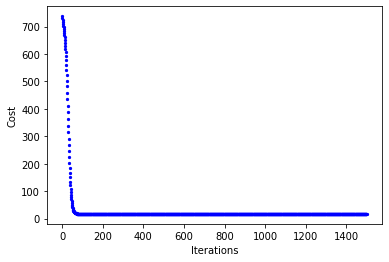

In [628]:
step_display = 50
eps=.0000005
n_features=1
max_iter= 1500
verbose= 1
lr = 0.001

df_pred, df_pred_alt, T, M, U, scale  = run_cofi_3d(
    Y_3d, R_3d,lr = lr,max_iter= max_iter,nf=nf,eps=eps,step_display=step_display)

In [633]:
# pred_rescaled = rescale_3d(pred, Ymean, R_3d,scale,scale_coef=10)
df_pred

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,4.92,4.92,4.92,0.98,0.98,0.98,0.98,0.98,0.98,4.92,4.92,4.92,1.97,1.97
1,4.92,4.92,4.92,0.98,0.98,0.98,0.98,0.98,0.98,4.92,4.92,4.92,1.97,1.97


In [634]:
df_target

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2


In [635]:
df_pred_alt

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,24.80,24.80,24.80,4.96,4.96,4.96,4.96,4.96,4.96,24.80,24.80,24.80,9.92,9.92
1,24.81,24.81,24.81,4.96,4.96,4.96,4.96,4.96,4.96,24.81,24.81,24.81,9.93,9.93


In [636]:
df_alt

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,25.0,25.0,25.0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,25.0,25.0,10.0,10.0
1,25.0,25.0,25.0,5.0,5.0,5.0,5.0,5.0,5.0,25.0,25.0,25.0,10.0,10.0


In [637]:
R= R_3d
R

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]])

In [638]:
Y= Y_3d